In [1]:
from src.DCGAN import DCGAN
from src.image_loader import ImgLoader
import matplotlib.pyplot as plt

# Experiments

The experiments will include three part as followings.

## 64*64 output DCGAN using chosen sliced dataset

This experiment will train a DCGAN whose output is 64 * 64, and the training dataset is using specific slice (5-10) dataset
based on the study of SSIM_Test. The result shows that the DCGAN can achieve mean SSIM between 256 fake and real images
above 0.6 three consecutive times after 1000 epochs.

In [2]:
# Parameters
IMG_SIZE = 64
TARGET_SLICE = list(range(5,10))

# Load dataset
img_loader = ImgLoader("D:\Datasets\keras_png_slices_data\keras_png_slices_train")
train_dataset = img_loader.load_to_tensor(target_slice=TARGET_SLICE,img_size=IMG_SIZE)

# Construct model
dcgan = DCGAN(IMG_SIZE,TARGET_SLICE)

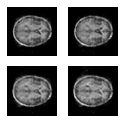

Epoch: 1003
Wall time: 54min 51s


In [6]:
%%time
hist_ssim = dcgan.train(train_dataset,10000,patience=3)
print('Epoch: '+ str(len(hist_ssim)))

0.61085254

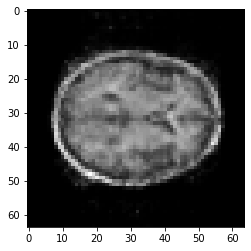

In [3]:
dcgan.load_model() # Load the latest model from checkpoints
fakes = dcgan.generate_images(256) # Generate 256 fake images
dcgan.cal_ssim(train_dataset) #Calculate mean ssim with 256 real images

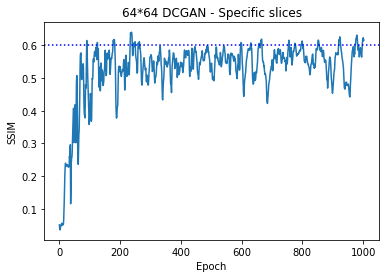

In [7]:
plt.plot(hist_ssim)
plt.title('64*64 DCGAN - Specific slices')
plt.axhline(y=0.6,ls=":",c="b")
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.show()

## 64*64 output DCGAN using whole dataset

This experiment will train a DCGAN whose output is 64*64, and the training dataset is using whole dataset. The reuslt shows that the DCGAN can achieve max SSIM between 256 fake and real images above 0.6 stably after 200 epochs.

In [2]:
IMG_SIZE = 64

# Load dataset
img_loader = ImgLoader("D:\Datasets\keras_png_slices_data\keras_png_slices_train")
train_dataset = img_loader.load_to_tensor(img_size=IMG_SIZE)

# Construct model
dcgan = DCGAN(IMG_SIZE)

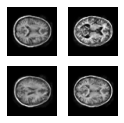

Epoch: 1003
Wall time: 5h 21min 41s


In [9]:
%%time
hist_ssim = dcgan.train(train_dataset,10000,patience=3)
print('Epoch: '+ str(len(hist_ssim)))

0.72734493

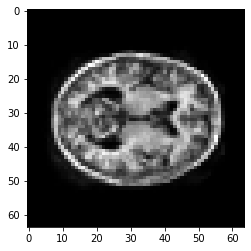

In [3]:
dcgan.load_model() # Load the latest model from checkpoints
fakes = dcgan.generate_images(256) # Generate 256 fake images
dcgan.cal_ssim(train_dataset) #Calculate mean ssim with 256 real images

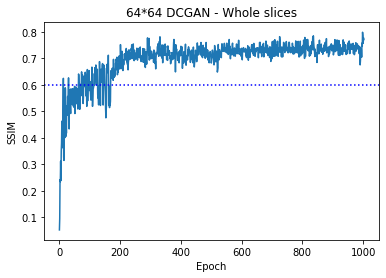

In [12]:
plt.plot(hist_ssim)
plt.title('64*64 DCGAN - Whole slices')
plt.axhline(y=0.6,ls=":",c="b")
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.show()